Observation 1: 
Pyber is has the highest utilization in urban areas.  However, the average fare in rural areas is almost equal to its urban conterpart. It is worth investing in rural cities. 

Observation 2:
Urban areas have the highest number of drivers (80.9%) where suburban drivers make up (16.5%) of the drivers.  Users in suburban areas have may have longer wait times to get a ride because the supply of drivers are much lower. 

Observation 3:
As expected the bulk of the revenue is coming from urban areas.  This may be due to multiple factors: less people own private transportation, there are more Pyber drivers in those areas. 

In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pandas import DataFrame
from pandas import Series

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data store into pandas data frame
city_df = pd.read_csv(city_data_to_load)
city_df

ride_df = pd.read_csv(ride_data_to_load)
ride_df

# Combine the data into a single dataset
merge_df = pd.merge(ride_df, city_df, on="city")
merge_df

# Display the data table for preview
merge_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

In [2]:
# break the file into dataframes separated by type.

urban_df = merge_df.loc[merge_df["type"] == "Urban"]
urban_df

suburban_df = merge_df.loc[merge_df["type"] == "Suburban"]
suburban_df

rural_df = merge_df.loc[merge_df["type"] == "Rural"]
rural_df

rural_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2018-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,Randallchester,2018-02-19 03:52:47,58.55,8004803682564,9,Rural
2252,Randallchester,2018-02-11 05:42:29,25.78,9010611749008,9,Rural
2253,Randallchester,2018-03-25 13:36:46,10.37,3216382725494,9,Rural
2254,Randallchester,2018-04-07 23:42:07,10.79,1615474447641,9,Rural


In [14]:
urban_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [15]:
suburban_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [16]:
rural_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [3]:
# Calculate the Urban average fares and ride count. 
Urban_Avg_Fares = urban_df.groupby(['city', 'type'])['fare'].mean()
Urban_Avg_Fares

Urban_Rides = urban_df.groupby(['city', 'type'])['fare'].count()
Urban_Rides

# Save the urban calculations into a summary data frame
Urban_Sum_df = pd.DataFrame({"avg_fares": Urban_Avg_Fares,
                           "tot_rides": Urban_Rides})
Urban_Sum_df.head()

,,avg_fares,tot_rides
city,type,,
Amandaburgh,Urban,24.641667,18
Barajasview,Urban,25.332273,22
Carriemouth,Urban,28.314444,27
Christopherfurt,Urban,24.501852,27
Deanville,Urban,25.842632,19


In [4]:
# Calculate the Suburban average fares and ride count. 
Suburban_Avg_Fares = suburban_df.groupby(['city', 'type'])['fare'].mean()
Suburban_Avg_Fares

Suburban_Rides = suburban_df.groupby(['city', 'type'])['fare'].count()
Suburban_Rides

# Save the urban calculations into a summary data frame
Suburban_Sum_df = pd.DataFrame({"avg_fares": Suburban_Avg_Fares,
                           "tot_rides": Suburban_Rides})
Suburban_Sum_df.head()

,,avg_fares,tot_rides
city,type,,
Barronchester,Suburban,36.422500,16
Bethanyland,Suburban,32.956111,18
Brandonfort,Suburban,35.437368,19
Colemanland,Suburban,30.894545,22
Davidfurt,Suburban,31.995882,17


In [5]:
# Calculate the Rural average fares and ride count. 
Rural_Avg_Fares = rural_df.groupby(['city', 'type'])['fare'].mean()
Rural_Avg_Fares

Rural_Rides = rural_df.groupby(['city', 'type'])['fare'].count()
Rural_Rides

# Save the urban calculations into a summary data frame
Rural_Sum_df = pd.DataFrame({"avg_fares": Rural_Avg_Fares,
                           "tot_rides": Rural_Rides})
Rural_Sum_df.head()

,,avg_fares,tot_rides
city,type,,
Bradshawfurt,Rural,40.064000,10
Garzaport,Rural,24.123333,3
Harringtonfort,Rural,33.470000,6
Jessicaport,Rural,36.013333,6
Lake Jamie,Rural,34.358333,6


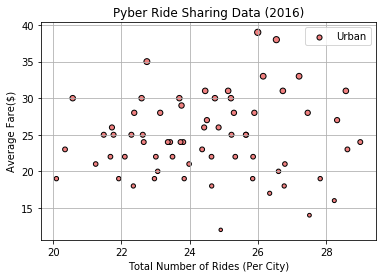

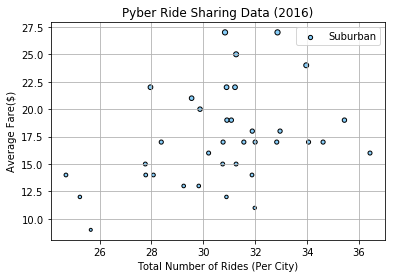

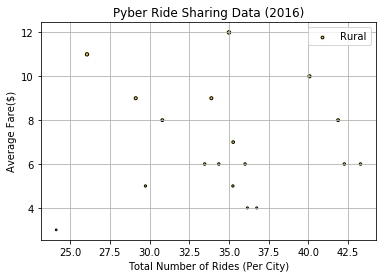

In [6]:
# The maximum x value for the chart will be 100
x_limit = 40

# List of values from 0 to 100 each value being 5 greater than the last
x_axis = np.arange(20, x_limit, 5)

# Build scatter plot
Urban_Sum_df.plot(kind='scatter', x='avg_fares', y='tot_rides', marker="o", c="lightcoral", edgecolors="black", s=Urban_Sum_df.tot_rides, label='Urban')

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare($)")
plt.grid()

# Save Plots
plt.savefig('scatter1.png')

# Build scatter plot
Suburban_Sum_df.plot(kind='scatter', x='avg_fares', y='tot_rides', marker="o", c="lightskyblue", edgecolors="black", s=Suburban_Sum_df.tot_rides, label='Suburban')

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare($)")
plt.grid()

# Save Plots
plt.savefig('scatter2.png')

# Build scatter plot
Rural_Sum_df.plot(kind='scatter', x='avg_fares', y='tot_rides', marker="o", c="gold", edgecolors="black", s=Rural_Sum_df.tot_rides, label='Rural')

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare($)")
plt.grid()

# Save Plots
plt.savefig('scatter3.png')

## Total Fares by City Type

In [7]:
# Calculate Type Percents

Fare_Type = merge_df.groupby(['type'])['fare'].sum()
Fare_Type

Fare_Sum_df = pd.DataFrame({"fare_sum": Fare_Type})
Fare_Sum_df.head()

,fare_sum
type,
Rural,4327.93
Suburban,19356.33
Urban,39854.38


In [8]:
# Labels for the sections of the pie chart
labels = ["Urban", "Suburban", "Rural"]

# The values of each section of the pie chart
sizes = [39854, 19356, 4327]

# The colors of each section of the pie chart
colors = ["lightcoral", "lightskyblue", "gold"]

# Tell matplotlib to seperate the "Urban" section from the others
explode = (0, 0, 0.1, 0)

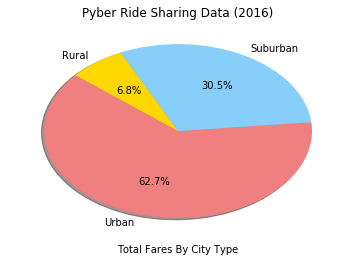

In [9]:
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Fares By City Type")

plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.savefig('FarePie.png')

## Total Rides by City Type

In [10]:
# Calculate Ride Percents

Fare_cnt = merge_df.groupby(['type'])['fare'].count()
Fare_cnt

Fare_cnt_df = pd.DataFrame({"fare_sum": Fare_cnt})
Fare_cnt_df.head()

,fare_sum
type,
Rural,125
Suburban,625
Urban,1625


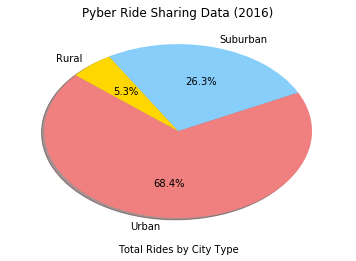

In [11]:
# Labels for the sections of the pie chart
labels = ["Urban", "Suburban", "Rural"]

# The values of each section of the pie chart
sizes = [1625, 625, 125]

# The colors of each section of the pie chart
colors = ["lightcoral", "lightskyblue", "gold"]

# Tell matplotlib to seperate the "Urban" section from the others
explode = (0, 0, 0.1, 0)

# Build Pie Chart
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Rides by City Type")

plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

# Save Figure
plt.savefig('RidePie.png')

## Total Drivers by City Type

In [12]:
# Calculate Driver Percents

city_df = merge_df[["city", "driver_count", "type"]]
city_df.head()

unique_city = city_df.drop_duplicates('city')
unique_city

unique_city.head()

driver_cnt = unique_city.groupby(['type'])['driver_count'].sum()
driver_cnt

driver_cnt_df = pd.DataFrame({"driver_cnt": driver_cnt})
driver_cnt_df.head()

,driver_cnt
type,
Rural,78
Suburban,490
Urban,2405


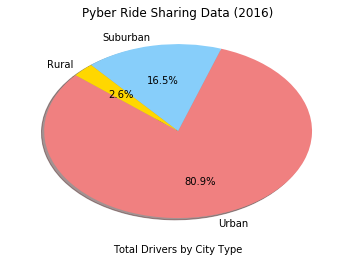

In [13]:
# Build Pie Charts
# Labels for the sections of the pie chart
labels = ["Urban", "Suburban", "Rural"]

# The values of each section of the pie chart
sizes = [2405, 490, 78]

# The colors of each section of the pie chart
colors = ["lightcoral", "lightskyblue", "gold"]

# Tell matplotlib to seperate the "Urban" section from the others
explode = (0, 0, 0.1, 0)

# Build Pie Chart
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Drivers by City Type")

plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

# Save Figure
plt.savefig('DriverPie.png')